In [2]:
from dis import disassemble

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import geopandas
import plotly.express as px
import numpy
import seaborn as sns

### Finding out about changes in male and female population in Slovakia
- is the population increasing or decreasing?
- finding out about male/female ratio

In [1]:
def country_query(table,*countries):
    query_str = ""
    if type(countries)==str:
        query_str +="Country == '" + countries +"'"
    else:
        for country in countries:
            query_str += "or Country == '" + country +"'"
        query_str = query_str[2:]


    return table.query(query_str)


### importing both male and female tables

In [29]:
url = "../Data/Annual_population_eurostat(mandatory).csv"
table = pd.read_csv(url)

query = country_query(table,"Slovakia").query("sex == 'T'").sort_values("2024",ascending=False)

display(query.head(5))
male = country_query(table,"Slovakia").query("sex == 'M'").sort_values("2024",ascending=False)
female = country_query(table,"Slovakia").query("sex == 'F'").sort_values("2024",ascending=False)
display(male.head(5))
display(female.head(5))

,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
480,Slovakia,SVK,TOTAL,T,5421349.0,5426252.0,5435343.0,5443120.0,5450421.0,5457873.0,5459781.0,5434712.0,5428792.0,5424687.0
181,Slovakia,SVK,NAT,T,5359583.0,5360412.0,5365648.0,5370237.0,5374305.0,5378937.0,5377706.0,5371646.0,5364540.0,5358701.0
574,Slovakia,SVK,UNK,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2924.0,2905.0,2999.0
364,Slovakia,SVK,STLS,T,1500.0,1499.0,1497.0,1495.0,1495.0,1493.0,1493.0,5.0,5.0,5.0
88,Slovakia,SVK,EU28_FOR,T,47202.0,50440.0,53511.0,55949.0,58308.0,60311.0,NaN,NaN,NaN,NaN


,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
441,Slovakia,SVK,TOTAL,M,2642328.0,2646082.0,2651684.0,2656514.0,2661077.0,2665350.0,2666486.0,2657903.0,2655094.0,2653217.0
150,Slovakia,SVK,NAT,M,2604107.0,2605148.0,2608235.0,2611094.0,2613689.0,2616210.0,2615483.0,2619889.0,2616397.0,2613497.0
543,Slovakia,SVK,UNK,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1710.0,1700.0,1743.0
333,Slovakia,SVK,STLS,M,952.0,951.0,950.0,949.0,949.0,947.0,947.0,2.0,2.0,2.0
58,Slovakia,SVK,EU28_FOR,M,30297.0,32508.0,34580.0,36142.0,37634.0,38908.0,NaN,NaN,NaN,NaN


,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
402,Slovakia,SVK,TOTAL,F,2779021.0,2780170.0,2783659.0,2786606.0,2789344.0,2792523.0,2793295.0,2776809.0,2773698.0,2771470.0
119,Slovakia,SVK,NAT,F,2755476.0,2755264.0,2757413.0,2759143.0,2760616.0,2762727.0,2762223.0,2751757.0,2748143.0,2745204.0
512,Slovakia,SVK,UNK,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1214.0,1205.0,1256.0
302,Slovakia,SVK,STLS,F,548.0,548.0,547.0,546.0,546.0,546.0,546.0,3.0,3.0,3.0
28,Slovakia,SVK,EU28_FOR,F,16905.0,17932.0,18931.0,19807.0,20674.0,21403.0,NaN,NaN,NaN,NaN


### Graph of change of male and female population in Slovakia

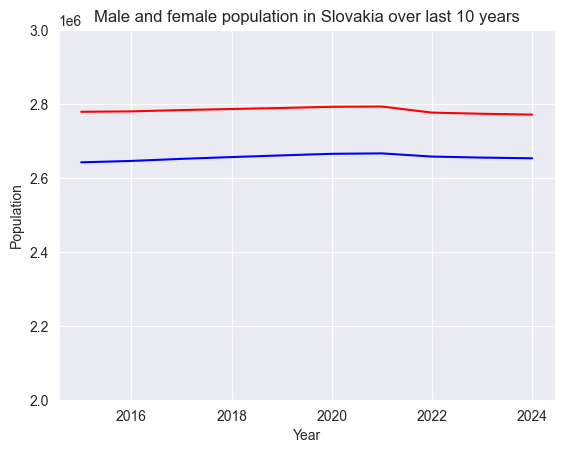

In [28]:
male_pop= []
female_pop = []
for i in range(10):
    male_pop.append(table.iloc[441,i+4])
    female_pop.append(table.iloc[402,i+4])


years = [x for x in range(2015,2025,1)]

figure, axes = plt.subplots()
axes.plot(years,male_pop,label="Male",color="blue")
axes.plot(years,female_pop,label="Female",color="red")
axes.set_ylim(2e6,3e6)

axes.set_xlabel('Year')
axes.set_ylabel('Population')
axes.set_title('Male and female population in Slovakia over last 10 years')
pass

### Female-Total and Male-Total population ratio

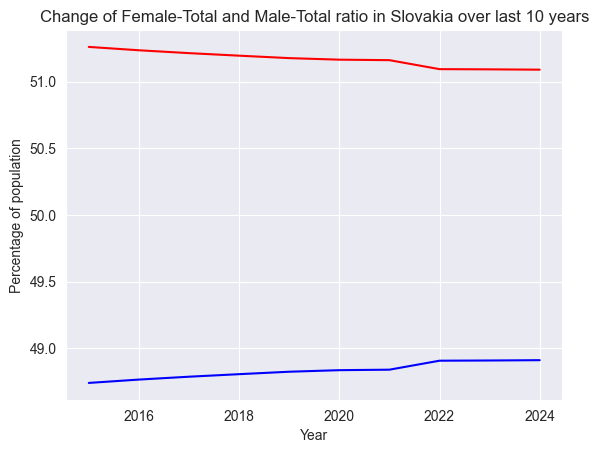

In [39]:
male_perc = []
female_perc = []
for i in range(10):
    male_perc.append(((table.iloc[441,i+4])/(table.iloc[480,i+4]))*100)
    female_perc.append(((table.iloc[402,i+4])/(table.iloc[480,i+4]))*100)

years = [x for x in range(2015,2025,1)]
figure, axes = plt.subplots()
axes.plot(years,male_perc,label="Male",color="blue")
axes.plot(years,female_perc,label="Female",color="red")
axes.set_xlabel('Year')
axes.set_ylabel('Percentage of population')
axes.set_title('Change of Female-Total and Male-Total ratio in Slovakia over last 10 years')
pass